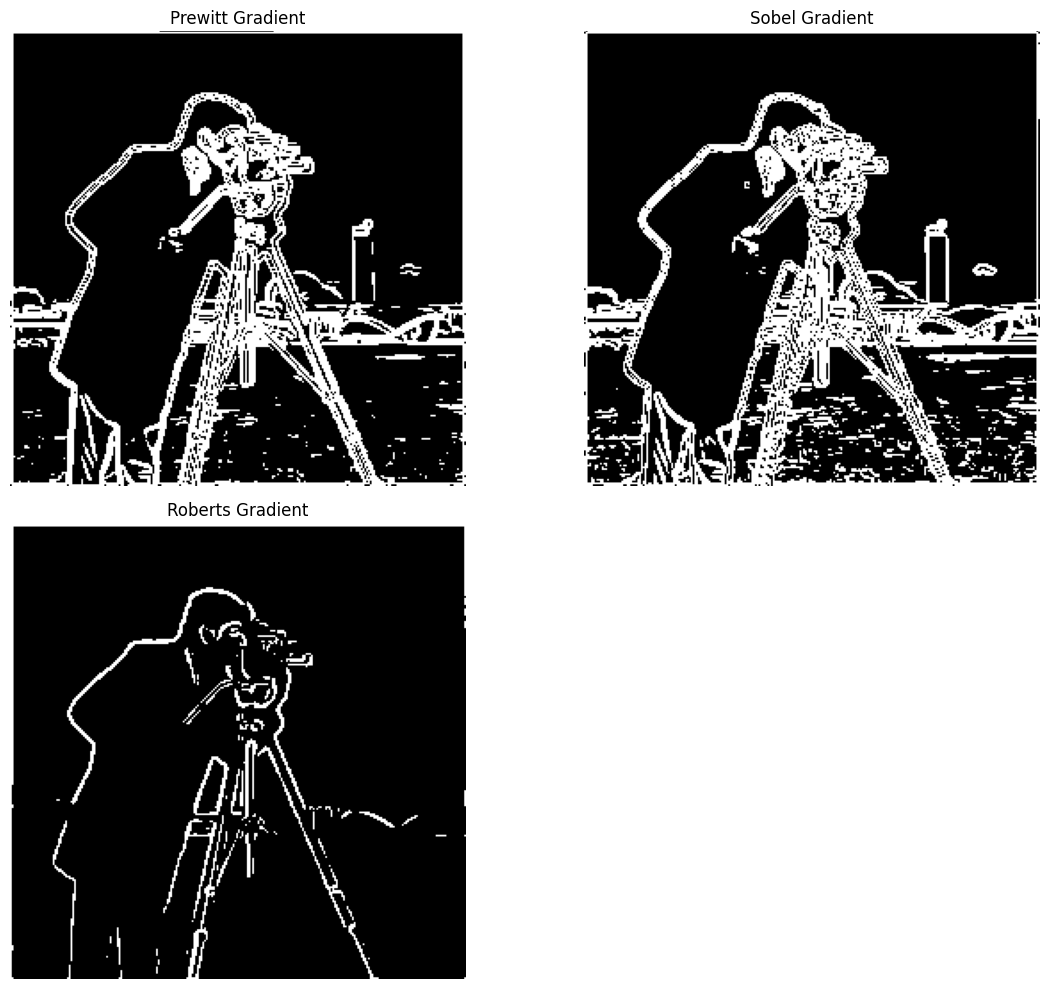

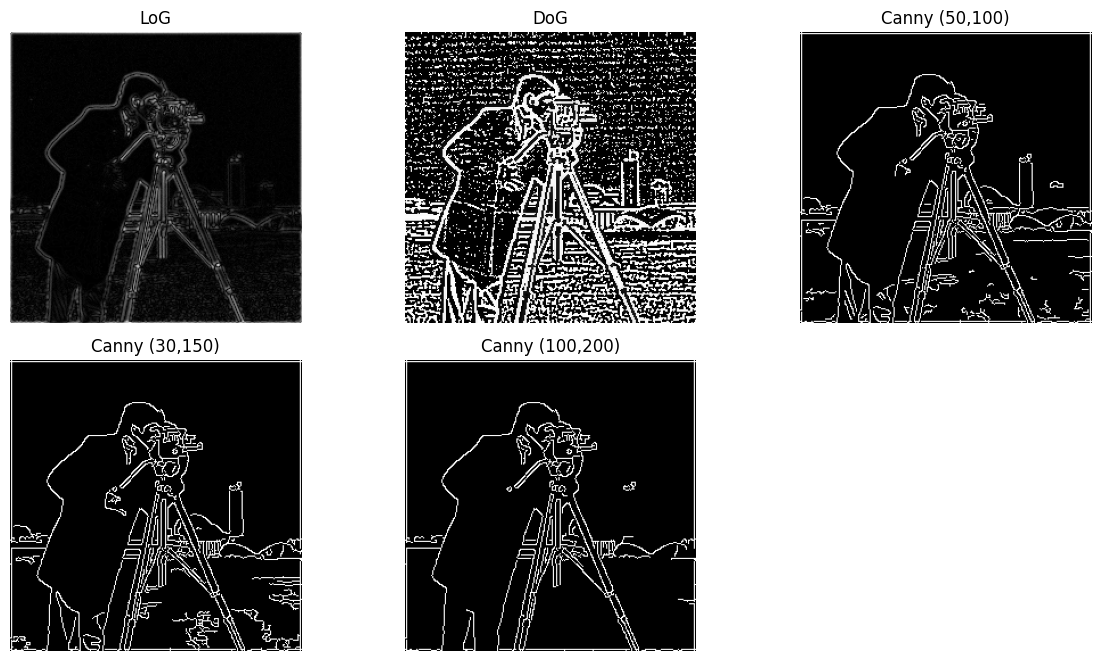

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

# Create folder to store results
output_folder = "./"
os.makedirs(output_folder, exist_ok=True)

# Load image (convert to grayscale)
image = cv2.imread('./cameraman.tif', cv2.IMREAD_GRAYSCALE)

# (a) Gaussian smoothing from scratch
def gaussian_filter(image, size, sigma):
    pad_size = size // 2
    padded = np.pad(image, pad_size, mode='constant', constant_values=0)
    result = np.zeros_like(image)

    # Create Gaussian kernel
    kernel = np.fromfunction(
        lambda x, y: (1 / (2 * np.pi * sigma ** 2)) * 
                     np.exp(-((x - pad_size) ** 2 + (y - pad_size) ** 2) / (2 * sigma ** 2)),
        (size, size)
    )
    kernel /= np.sum(kernel)

    # Apply filter
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            result[i, j] = np.sum(padded[i:i+size, j:j+size] * kernel)
    
    return result

# Apply Gaussian filter for smoothing
smoothed_image = gaussian_filter(image, size=5, sigma=1.0)

# (b) Gradient calculation using Prewitt, Sobel, and Roberts Cross operators

# Prewitt operator
prewitt_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
prewitt_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

# Sobel operator
sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

# Roberts operator
roberts_x = np.array([[1, 0], [0, -1]])
roberts_y = np.array([[0, 1], [-1, 0]])

# Function to calculate gradient manually
def compute_gradient(image, kernel_x, kernel_y):
    pad_size = kernel_x.shape[0] // 2
    padded = np.pad(image, pad_size, mode='constant', constant_values=0)
    result = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            gx = np.sum(padded[i:i + kernel_x.shape[0], j:j + kernel_x.shape[1]] * kernel_x)
            gy = np.sum(padded[i:i + kernel_y.shape[0], j:j + kernel_y.shape[1]] * kernel_y)
            result[i, j] = np.sqrt(gx**2 + gy**2)
    
    return result

# Compute gradients
prewitt_gradient = compute_gradient(smoothed_image, prewitt_x, prewitt_y)
sobel_gradient = compute_gradient(smoothed_image, sobel_x, sobel_y)
roberts_gradient = compute_gradient(smoothed_image, roberts_x, roberts_y)

# (c) Thresholding
threshold = 50

prewitt_thresholded = (prewitt_gradient > threshold).astype(np.uint8) * 255
sobel_thresholded = (sobel_gradient > threshold).astype(np.uint8) * 255
roberts_thresholded = (roberts_gradient > threshold).astype(np.uint8) * 255

# Save the manually computed edges
cv2.imwrite(f"{output_folder}/prewitt_gradient.png", prewitt_thresholded)
cv2.imwrite(f"{output_folder}/sobel_gradient.png", sobel_thresholded)
cv2.imwrite(f"{output_folder}/roberts_gradient.png", roberts_thresholded)

# Plot results (Manual)
plt.figure(figsize=(12, 10))
titles = ['Prewitt Gradient', 'Sobel Gradient', 'Roberts Gradient']
images = [prewitt_thresholded, sobel_thresholded, roberts_thresholded]

for i in range(3):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

# ================================
# (II) Built-in Edge Detection
# ================================

# Laplacian of Gaussian (LoG)
log = cv2.Laplacian(smoothed_image, cv2.CV_64F)
log = np.uint8(np.absolute(log))

# Difference of Gaussian (DoG)
gaussian1 = cv2.GaussianBlur(image, (5, 5), 1.0)
gaussian2 = cv2.GaussianBlur(image, (5, 5), 2.0)
dog = gaussian1 - gaussian2

# Canny Edge Detection (Different Thresholds)
canny1 = cv2.Canny(smoothed_image, 50, 100)
canny2 = cv2.Canny(smoothed_image, 30, 150)
canny3 = cv2.Canny(smoothed_image, 100, 200)

# Save results
cv2.imwrite(f"{output_folder}/log.png", log)
cv2.imwrite(f"{output_folder}/dog.png", dog)
cv2.imwrite(f"{output_folder}/canny_50_100.png", canny1)
cv2.imwrite(f"{output_folder}/canny_30_150.png", canny2)
cv2.imwrite(f"{output_folder}/canny_100_200.png", canny3)

# Plot results (Built-in)
plt.figure(figsize=(12, 10))
titles = ['LoG', 'DoG', 'Canny (50,100)', 'Canny (30,150)', 'Canny (100,200)']
images = [log, dog, canny1, canny2, canny3]

for i in range(5):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()
